Preprocessing Image.
1. Locate directories.
2. Loop through main directory.
3. Loop through each class.
4. Get image path for each class.

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

Reading CSV into a Dataframe

In [4]:
# csv_path = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst-e_image_details.csv'
csv_path = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst-e_data\\mst-e_image_details.csv'

df = pd.read_csv(csv_path)

print(f'Length before Data Cleaning: {len(df)}')

# Removing mp4 and dngs (files that are not images)
df = df[~df["image_ID"].str.endswith((".mp4", ".dng"))]

print(f'Length after Data Cleaning: {len(df)}')

Length before Data Cleaning: 1546
Length after Data Cleaning: 1490


Testing on single image, resizing through keras

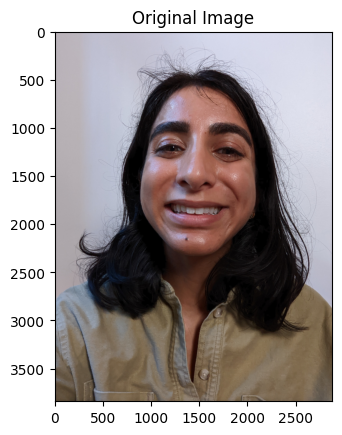

(2880, 3840)


Text(0.5, 1.0, 'Resized Image')

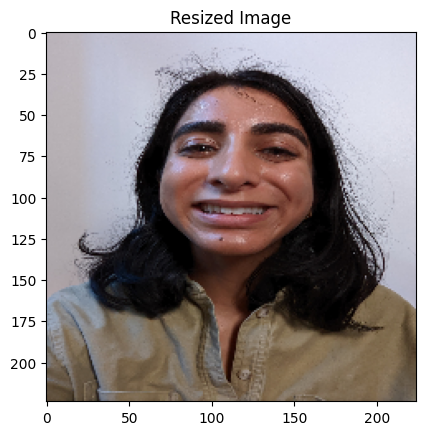

In [9]:
image_path = df['image_ID'] 
folder_name = df['subject_name']  
label = df['MST']  

# main_dir = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data'
main_dir = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst-e_data'

# full_image_path = os.path.join(main_dir,folder_name.iloc[0], image_path.iloc[0])
full_image_path = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst-e_data\\subject_7\\PXL_20220922_200554422.jpg'


img = tf.keras.utils.load_img(full_image_path)
plt.imshow(img)
plt.title("Original Image")
plt.show()
print(img.size)

image_array = tf.keras.preprocessing.image.img_to_array(img) #Image to array
new_img = tf.image.resize(image_array, (224, 224)) #Resizing to Array
resized_img = tf.keras.preprocessing.image.array_to_img(new_img) #Resized array back to image
plt.imshow(resized_img)
plt.title("Resized Image")


Testing on entire dataset using opencv

In [ ]:
images =[]
labels =[]

# Function to resize images 
def resize_and_save(input_folder, output_folder, df, target_size=(448, 448)):
   
    os.makedirs(output_folder, exist_ok=True)

    # Progress bar
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing Images"):
        # CSV info extraction
        folder_name = row['subject_name']
        image_name = row['image_ID']
        label = row['MST']

        # Build paths
        input_path = os.path.join(input_folder, folder_name, image_name)
        output_path = os.path.join(output_folder, f"{label}_{image_name}")

        img = cv2.imread(input_path)
        if img is None:
            print(f"Could not read the image at: {input_path}")
            continue  
        else:
            labels.append(label)

        # Read and resize 
        img = cv2.imread(input_path)
        img = cv2.resize(img, target_size)

        images.append(img)

        # Save the resized image to the output folder
        cv2.imwrite(output_path, img)

if __name__ == "__main__":
    input_folder = "'E:\\University\\FYP Stuff\\Dataset\\mst-e_data"  
    output_folder = "'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_resized"   
    csv_path = "'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst-e_image_details.csv" 

    resize_and_save(input_folder, output_folder, df)

Processing Images:  89%|████████▊ | 1320/1490 [09:01<00:51,  3.29it/s]

Could not read the image at: D:\NUST\SEM 7\Computer Vision\Project\mst-e_data\mst-e_data\subject_2\bottom


Processing Images: 100%|██████████| 1490/1490 [10:07<00:00,  2.45it/s]
